#Lab 4:

Can we use machine learning algorithms to accurately group wines based on their chemical composition? How do we know our classification is accurate?

Kmeans clustering looks for groupings in data by minimizing variance withing clusters and maximizing variance between clusters.


This lab looked at using kmeans clustering on a wine dataset to try to group wines based on their chemical compositions.

#Imports

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
import sympy
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

#Load the dataset from sklearn

In [ ]:
from sklearn.datasets import load_wine
wine_data = load_wine()
wine_df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


#About data


In [ ]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [ ]:
#Check for nans
nans = wine_df.isna().sum()
nans

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [ ]:
# Checking for outliers using the IQR method
Q1 = wine_df.quantile(0.25)
Q3 = wine_df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((wine_df < (Q1 - 1.5 * IQR)) | (wine_df > (Q3 + 1.5 * IQR))).sum()
#I wanted to see which values of each were outliers
outlier_details = {column: wine_df[column][((wine_df[column] < (Q1[column] - 1.5 * IQR[column])) | (wine_df[column] > (Q3[column] + 1.5 * IQR[column])))]
                   for column in wine_df.columns if ((wine_df[column] < (Q1[column] - 1.5 * IQR[column])) | (wine_df[column] > (Q3[column] + 1.5 * IQR[column]))).any()}

outliers, outlier_details


(alcohol                         0
 malic_acid                      3
 ash                             3
 alcalinity_of_ash               4
 magnesium                       4
 total_phenols                   0
 flavanoids                      0
 nonflavanoid_phenols            0
 proanthocyanins                 2
 color_intensity                 4
 hue                             1
 od280/od315_of_diluted_wines    0
 proline                         0
 dtype: int64,
 {'malic_acid': 123    5.80
  137    5.51
  173    5.65
  Name: malic_acid, dtype: float64,
  'ash': 25     3.22
  59     1.36
  121    3.23
  Name: ash, dtype: float64,
  'alcalinity_of_ash': 59     10.6
  73     30.0
  121    28.5
  127    28.5
  Name: alcalinity_of_ash, dtype: float64,
  'magnesium': 69    151.0
  73    139.0
  78    136.0
  95    162.0
  Name: magnesium, dtype: float64,
  'proanthocyanins': 95     3.28
  110    3.58
  Name: proanthocyanins, dtype: float64,
  'color_intensity': 151    10.80
  158    13.00

##Visualize outliers

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
axes = axes.flatten()
# Loop through the features and create a boxplot for each
for i, col in enumerate(wine_df.columns):
    sns.boxplot(y=wine_df[col], ax=axes[i])
    axes[i].set_title(f'Box plot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
for ax in axes[len(wine_df.columns):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

The wine dataset has 178 entries. The dataset is comprised of 13 columns, detailing atributes of the wine.  There is no null values, but, there are outliers in malic acid, ash. alcalinity_of_ash, magnesium, proanthocyanis, color_intensity, and hue.

    Alcohol: Numerical; represents the alcohol content of the wine.
    Malic Acid: Numerical; refers to the concentration of malic acid in the wine. This feature has outliers.
    Ash: Numerical; indicates the ash content of the wine, which reflects mineral content. This feature also has outliers.
    Alcalinity of Ash: Numerical; measures the alkalinity of ash derived from the wine. Outliers are present in this feature.
    Magnesium: Numerical; shows the magnesium content in the wine. This feature contains outliers.
    Total Phenols: Numerical; refers to the total amount of phenols in the wine.
    Flavanoids: Numerical; a type of phenol, specifically flavanoids present in the wine.
    Nonflavanoid Phenols: Numerical; measures the non-flavanoid phenols in the wine.
    Proanthocyanins: Numerical; another type of phenolic compound found in the wine. This feature has outliers.
    Color Intensity: Numerical; relates to the intensity of the wine's color. There are outliers in this feature.
    Hue: Numerical; indicates the color hue of the wine. This feature contains outliers.
    OD280/OD315 of Diluted Wines: Numerical; a measure of the wine's optical density.
    Proline: Numerical; the amount of proline amino acid in the wine.

#Remove outliers

In [ ]:
outlier_mask = (wine_df < (Q1 - 1.5 * IQR)) | (wine_df > (Q3 + 1.5 * IQR))
wine_df_clean = wine_df[~outlier_mask.any(axis=1)]
wine_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       161 non-null    float64
 1   malic_acid                    161 non-null    float64
 2   ash                           161 non-null    float64
 3   alcalinity_of_ash             161 non-null    float64
 4   magnesium                     161 non-null    float64
 5   total_phenols                 161 non-null    float64
 6   flavanoids                    161 non-null    float64
 7   nonflavanoid_phenols          161 non-null    float64
 8   proanthocyanins               161 non-null    float64
 9   color_intensity               161 non-null    float64
 10  hue                           161 non-null    float64
 11  od280/od315_of_diluted_wines  161 non-null    float64
 12  proline                       161 non-null    float64
dtypes: float64

#Preprocessing


##Drop target labels
- Ensure clustering is only based on input features.

In [ ]:
# Drop target label
wine_df_clean = wine_df_clean.drop(columns='target', errors='ignore')

##Scale Feautures
- zero mean and unit variance sice Kmeans is affected by scale of data, and those with a larger scale can influence algorithim disporportionaly since it is a distance based calculation so need to ensure all feautures contribute equally.

In [ ]:
# Scale the features
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_df_clean)

#Determe the Number of Clusters to use

##Elbow method
- Plot inertia against a range (1-10) of possible cluster counts to find sum of squared distances of samples to their closes cluster center. In the plot you fund an elbow where the reduction in inertia slows which indicates a balance between # of clusters and compactness.

In [ ]:
# Determine the range of clusters to try
inertias = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(wine_scaled)
    inertias.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

###Plot of elbow curve

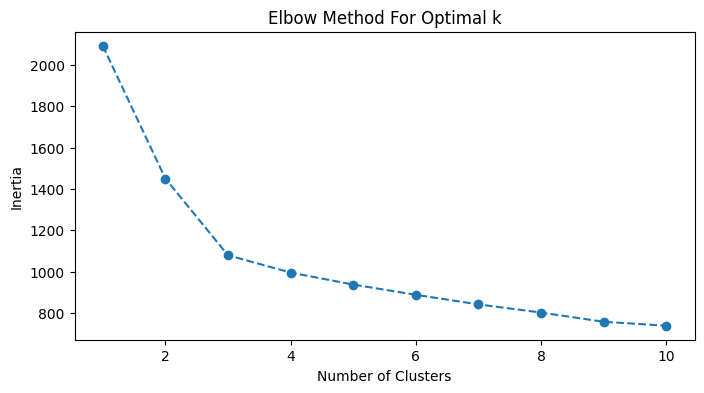

In [ ]:
# Plotting the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, inertias, marker='o', linestyle = '--')
plt.title("Elbow Method For Optimal k")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

The inertia began to slow at 3 clusters. Which indicates a balance between not having too many clusters and keeping the clusters distinct.

##Silhouette Analysis
- Determine effectiveness of the clustering. Calculate the silhouette scores for various numbers of clusters to find the optimal number where the score is the highest which indicates better defined and seperated clusters.



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

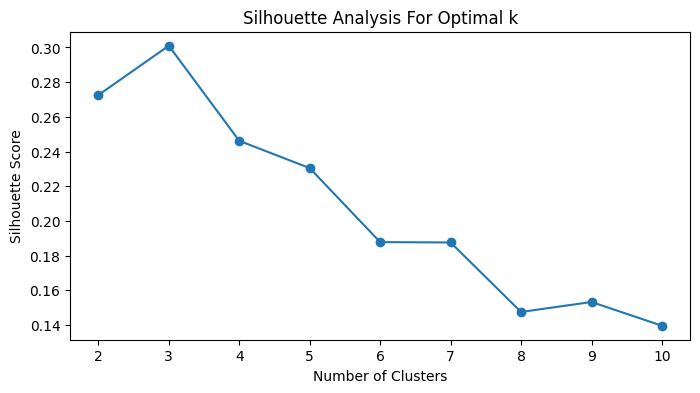

In [ ]:
silhouette_scores = []
cluster_range = range(2, 11) #1 gives errors
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(wine_scaled)
    silhouette_scores.append(silhouette_score(wine_scaled, cluster_labels))

# Plotting the silhouette scores
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Analysis For Optimal k")
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


3 clusters has the highest silhouette score of 0.28. However, it is not close to one which indicates that the object is not well matched to its own cluster and not as poorly matched to neignoring clusters as we'd like.

###Silhouette plot

Based on all the graphs, the best number of clusters for this data is 3.

#Fit K-Means Model



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


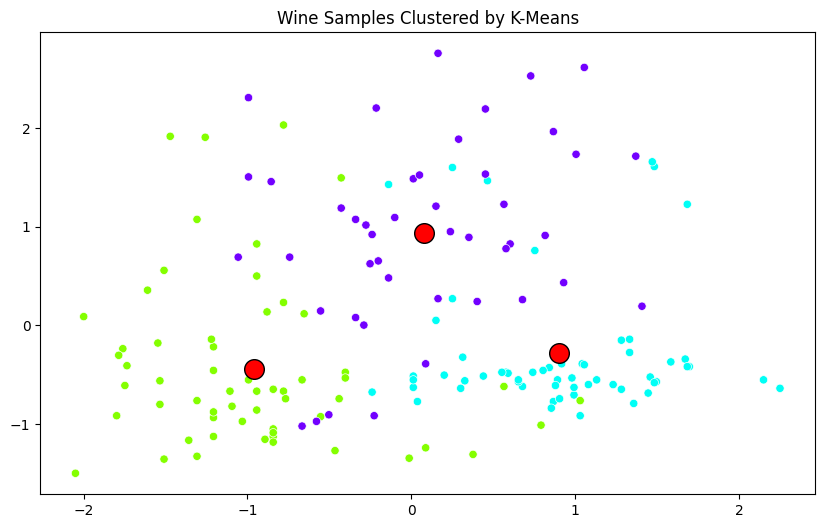

In [ ]:
optimal_k = 3  # Based on previous analysis
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans_final.fit_predict(wine_scaled)

# Plotting clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=wine_scaled[:, 0], y=wine_scaled[:, 1], hue=clusters, palette=sns.color_palette("hsv", optimal_k), legend=None)
plt.title('Wine Samples Clustered by K-Means')
#plotting the centroids of the clusters
centroids = kmeans_final.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], marker ='o', c='red', s=200, edgecolors='k')
plt.show()

#it would look a littele better if I used PCA to graph it.

This analysis suggests that 3 different types of wines can be distinguised based on their chemical composition. The clustering algorithim effectivly grouped similar types together.

#Cluster Meanings

In [ ]:
# Add cluster labels to the original DataFrame
wine_df_clean['Cluster'] = clusters

# Ensure 'features' list only includes relevant columns for plotting
features = wine_df_clean.columns[:-1]  # Exclude the 'Cluster' column

# Calculate descriptive statistics
cluster_means = wine_df_clean.groupby('Cluster').mean()
print("Cluster Means:")
print(cluster_means)

cluster_medians = wine_df_clean.groupby('Cluster').median()
print("Cluster Medians:")
print(cluster_medians)


Cluster Means:
           alcohol  malic_acid       ash  alcalinity_of_ash   magnesium  \
Cluster                                                                   
0        12.277069    1.845345  2.259310          20.187931   91.086207   
1        13.756724    2.010000  2.442414          16.900000  106.034483   
2        13.100889    3.284222  2.395333          21.006667   98.466667   

         total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
Cluster                                                                     
0             2.241034    2.067414              0.359310         1.560862   
1             2.843793    2.987586              0.286897         1.898966   
2             1.640667    0.796889              0.448444         1.079333   

         color_intensity       hue  od280/od315_of_diluted_wines      proline  
Cluster                                                                        
0               3.011207  1.060793                      2.82413

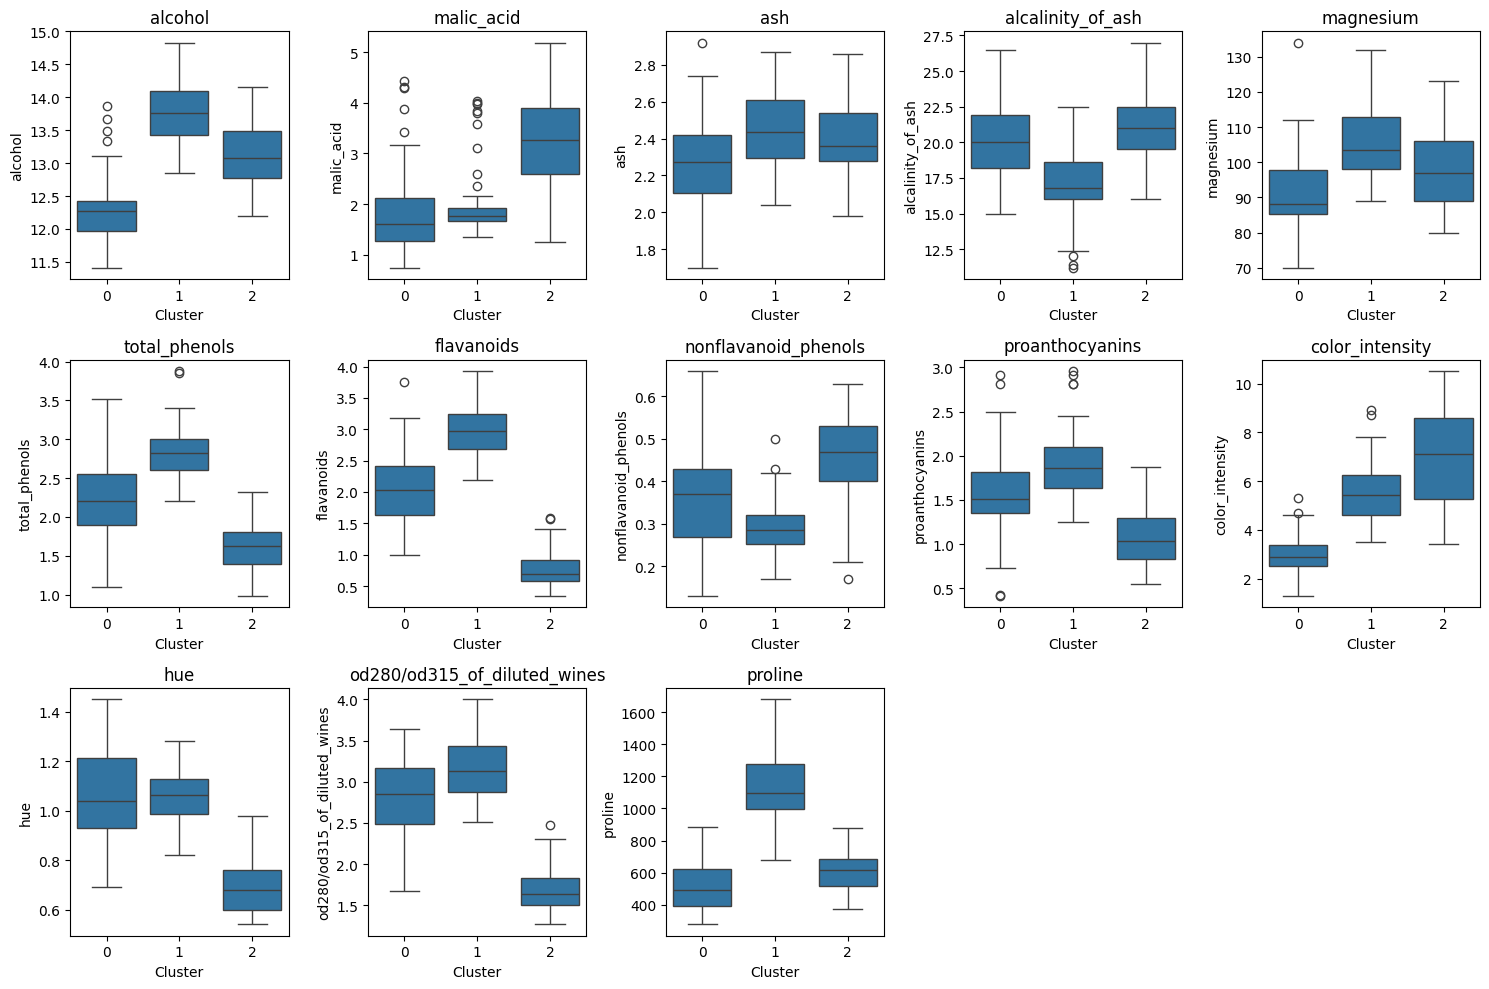

In [ ]:
# Visualizing feature distributions by cluster using box plots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 5, i + 1)  # Adjust subplot layout based on the actual number of features
    sns.boxplot(x='Cluster', y=feature, data=wine_df_clean)
    plt.title(feature)
plt.tight_layout()
plt.show()


Clusters 0 and 1 had some of the data as outliers meaning that it wasnt close to the mean of clustors centroid. Cluster 2 only had 2 data points that didnt fit within the mean of the centroid for the optical denisty and the falvanoids.

**Cluster 2 Characteristics:**

- Higher levels of malic acid compared to other clusters.
- Lower levels of flavanoids
- Higher color intensity on average.
- Lowest levels of od280/od315 of diluted wines - related to wine quality.
- The mean proline (amino acid associated with wine quality) levels are lower than those in cluster 1 but higher than cluster 0.

**Cluster 1 Characteristics:**

- Highest average alcohol content.
- Lower average malic acid than Clustor 2
- Highest average flavanoids, indicating potentially higher antioxidant properties and possibly higher quality.
- Lowest average alcalinity of ash, which could suggest a different soil composition or grape type.
- Highest average total phenols, which contribute to taste and mouthfeel.
- Higher hue values, indicating a possible variance in wine color.
- Highest median and mean values for od280/od315 of diluted wines, which could indicate higher quality wines.
- Highest proline levels, typically associated with higher quality wines.

Cluster 0 Characteristics:

- Lowest average alcohol content.
- Malic acid levels lower than Cluster 2 but similar to Cluster 1.
- Lowest magnesium levels.
- Lower total phenols and flavanoids compared to C1 but higher than C0.
- The color intensity is the lowest, suggesting lighter wines.
- Hue values are similar to cluster, indicating a resemblance in wine color.
- Proline levels are the lowest, which may suggest a lower quality compared to the other clusters.

C2 could represent wines with a higher robustness and color intensity, possibly younger or less refined wines.

C1 appears to consist of wines that may be of a higher quality due to higher flavanoids, total phenols, and other indicators related to quality.

C0 might include lighter wines, possibly white wines, which have lower alcohol, color intensity, and proline levels.

The Kmeans algorithim is somewhat effective at grouping wines based on their chemical compositions. The combination of low inertia (from the Elbow method) and relatively high silhouette scores (not -1 or 0...) suggests that the clusters are both compact and well-separated but have moderate cluster overlap and some wines may not be as well matched to their clusters meaning that our analysis may not be accurate.  